# Medical Image Classification
## Solution 1: Building a Convnet from Scratch

In this exercise, we will build a classifier model from scratch that is able to distinguish medical images. We will follow these steps:

1. Prepare the data & model hyperparameters
2. Explore the data
3. Build a small convnet from scratch to solve our classification problem
4. Evaluate training and validation accuracy

Let's go!

## Prepare data to classicfication classes, set Hyperparams

In [1]:
base_dir = '/media/ente/M2/2018 - 11 - sorted data'
#base_dir = '/home/ente/Schreibtisch/2018 - 11 - sorted data'
class_names = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax' ]
img_width = img_height = 1024
color_channels = 1

#split data into training set and validation set as a fraction of total data
validation_split = 0.2

#layers & optimizer
target_width = target_height = 299
target_size = (target_height, target_width)
pooling_window = 2
conv_window = 3
kernel_size = 16
dropout= 0.5
activation = "relu"
optimizer = 'Adam'
loss='categorical_crossentropy'
#metrics= ['acc']
metrics=['categorical_accuracy']
class_mode = 'categorical'
batch_size = 20
epochs = 30
verbose = 2
lr = 0.001

## Explore the data

total Atelectasis images:        2015
total Cardiomegaly images:       464
total Consolidation images:      633
total Edema images:              310
total Effusion images:           1804
total Emphysema images:          461
total Fibrosis images:           366
total Hernia images:             53
total Infiltration images:       4640
total Mass images:               1043
total No_Finding images:         28000
total Nodule images:             1273
total Pleural_Thickening images: 525
total Pneumonia images:          161
total Pneumothorax images:       1099


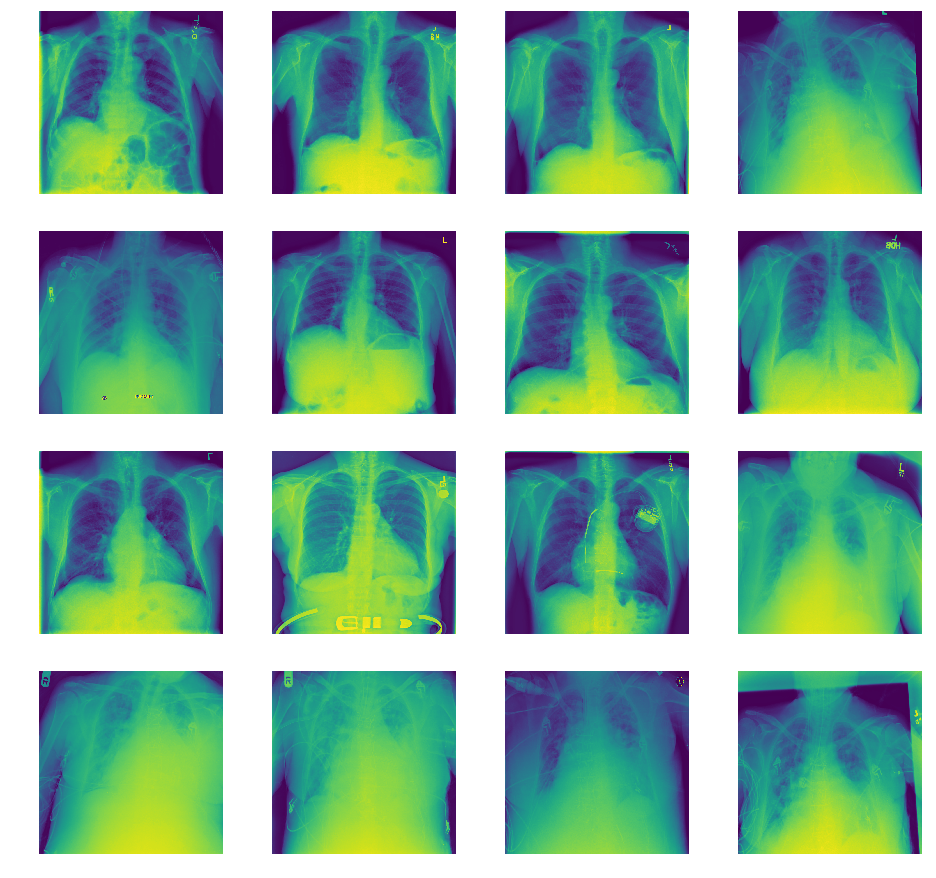

In [2]:
#Let's start by exploring our example data, they are locally stored in `/home/ente/Schreibtisch/`.
#The base directory `/home/ente/Schreibtisch/sorted data/`, which contains the example dataset.
#train_test_split_dir(source=base_dir, destination=target_dir)

#base_dir = target_dir
# Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):
import os
# Directories with our example pictures
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
train_ate_dir = os.path.join(base_dir, class_names[0])
train_car_dir = os.path.join(base_dir, class_names[1])
train_con_dir = os.path.join(base_dir, class_names[2])
train_ede_dir = os.path.join(base_dir, class_names[3])
train_eff_dir = os.path.join(base_dir, class_names[4])

train_emp_dir = os.path.join(base_dir, class_names[5])
train_fib_dir = os.path.join(base_dir, class_names[6])
train_her_dir = os.path.join(base_dir, class_names[7])
train_inf_dir = os.path.join(base_dir, class_names[8])
train_mas_dir = os.path.join(base_dir, class_names[9])

train_nof_dir = os.path.join(base_dir, class_names[10])
train_nod_dir = os.path.join(base_dir, class_names[11])
train_ple_dir = os.path.join(base_dir, class_names[12])
train_pne_dir = os.path.join(base_dir, class_names[13])
train_pn2_dir = os.path.join(base_dir, class_names[14])

train_ate_fnames = os.listdir(train_ate_dir)
train_car_fnames = os.listdir(train_car_dir)
train_con_fnames = os.listdir(train_con_dir)
train_ede_fnames = os.listdir(train_ede_dir)
train_eff_fnames = os.listdir(train_eff_dir)

train_emp_fnames = os.listdir(train_emp_dir)
train_fib_fnames = os.listdir(train_fib_dir)
train_her_fnames = os.listdir(train_her_dir)
train_inf_fnames = os.listdir(train_inf_dir)
train_mas_fnames = os.listdir(train_mas_dir)

train_nof_fnames = os.listdir(train_nof_dir)
train_nod_fnames = os.listdir(train_nod_dir)
train_ple_fnames = os.listdir(train_ple_dir)
train_pne_fnames = os.listdir(train_pne_dir)
train_pn2_fnames = os.listdir(train_pn2_dir)

#print (train_ate_fnames[:10])
#train_car_fnames.sort()
#print (train_car_fnames[:10])

#Let's find out the total number of all class-images in the `train` and `validation` directories:
print ('total Atelectasis images:       ', len(os.listdir(train_ate_dir))) 
print ('total Cardiomegaly images:      ', len(os.listdir(train_car_dir))) 
print ('total Consolidation images:     ', len(os.listdir(train_con_dir))) 
print ('total Edema images:             ', len(os.listdir(train_ede_dir))) 
print ('total Effusion images:          ', len(os.listdir(train_eff_dir))) 

print ('total Emphysema images:         ', len(os.listdir(train_emp_dir))) 
print ('total Fibrosis images:          ', len(os.listdir(train_fib_dir))) 
print ('total Hernia images:            ', len(os.listdir(train_her_dir))) 
print ('total Infiltration images:      ', len(os.listdir(train_inf_dir))) 
print ('total Mass images:              ', len(os.listdir(train_mas_dir))) 

print ('total No_Finding images:        ', len(os.listdir(train_nof_dir))) 
print ('total Nodule images:            ', len(os.listdir(train_nod_dir))) 
print ('total Pleural_Thickening images:', len(os.listdir(train_ple_dir))) 
print ('total Pneumonia images:         ', len(os.listdir(train_pne_dir))) 
print ('total Pneumothorax images:      ', len(os.listdir(train_pn2_dir))) 


#Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 15x4 configuration
nrows = 15
#nrows = 2
ncols = 4

# Index for iterating over images
pic_index = 0


# Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_ate_pix = [os.path.join(train_ate_dir, fname) 
                for fname in train_ate_fnames[pic_index-8:pic_index]]
next_car_pix = [os.path.join(train_car_dir, fname) 
                for fname in train_car_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_ate_pix+next_car_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a Small Convnet from Scratch to Get to 72% Accuracy

The images that will go into our convnet are 1024x1024 color images (in the next section on Data Preprocessing, we'll add handling to resize all the images to 299x299 before feeding them into the neural network).

Let's code up the architecture. We will stack 3 {convolution + relu + maxpooling} modules. Our convolutions operate on 3x3 windows and our maxpooling layers operate on 2x2 windows. Our first convolution extracts 16 filters, the following one extracts 32 filters, and the last one extracts 64 filters.

**NOTE**: This is a configuration that is widely used and known to work well for image classification. Also, since we have relatively few training examples (1,000), using just three convolutional modules keeps the model small, which lowers the risk of overfitting (which we'll explore in more depth in Exercise 2.)

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [4]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for the three color channels: R, G, and B
#img_input = layers.Input(shape=(img_width, img_height, color_channels))
img_input = layers.Input(shape=(target_width, target_height, color_channels))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(kernel_size, conv_window, activation=activation)(img_input)
x = layers.MaxPooling2D(pooling_window)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(2*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(4*kernel_size, conv_window, activation=activation)(x)
x = layers.MaxPooling2D(pooling_window)(x)

On top of it we stick two fully-connected layers.

In [5]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation=activation)(x)

# Add Droptout Regularization
x = layers.Dropout(dropout)(x)

# Create output layer with a single node and sigmoid activation
#output = layers.Dense(1, activation='sigmoid')(x)
output = layers.Dense(len(class_names), activation = 'softmax') (x)


# Create model: input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully connected layer + sigmoid output layer
model = Model(img_input, output)

Let's summarize the model architecture:

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 299, 299, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 297, 297, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
__________

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the feature map.

Next, we'll configure the specifications for model training. We will train our model with the `categircal_crossentropy` loss, because it's a multi-class classification problem and our final activation is a softmax. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `Adam` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because Adam automates learning-rate tuning for us. (Other optimizers,such as RMSprop [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
# Flow training images in batches of 20 using train_datagen generator
datagen = ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=validation_split) # set validation split

#test data will not be augmented
#test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='grayscale',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode='grayscale',
    subset='validation') # set as validation data


Found 34283 images belonging to 15 classes.
Found 8564 images belonging to 15 classes.


## Training
Let's train on all (42.862 / validation_split = training-images) images available, for 15 epochs, and validate on all validation images (This will take a couple of hours to run).

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs)

Epoch 1/30
1714/1714 [==============================] - 519s 303ms/step - loss: 5.5881 - categorical_accuracy: 0.6528 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 2/30
1714/1714 [==============================] - 518s 302ms/step - loss: 5.5835 - categorical_accuracy: 0.6536 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 3/30
1714/1714 [==============================] - 520s 304ms/step - loss: 5.5859 - categorical_accuracy: 0.6534 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 4/30
1714/1714 [==============================] - 517s 302ms/step - loss: 5.5843 - categorical_accuracy: 0.6535 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 5/30
1714/1714 [==============================] - 520s 304ms/step - loss: 5.5949 - categorical_accuracy: 0.6529 - val_loss: 5.5773 - val_categorical_accuracy: 0.6540
Epoch 6/30
1714/1714 [==============================] - 519s 303ms/step - loss: 5.5829 - categorical_accuracy: 0.6536 - val_loss: 5.5773 - v

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

In [10]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_ate_dir, f) for f in train_ate_fnames]
dog_img_files = [os.path.join(train_car_dir, f) for f in train_car_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=target_size)  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

ValueError: Error when checking input: expected input_1 to have shape (299, 299, 1) but got array with shape (299, 299, 3)

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5,1,'Training and validation loss')

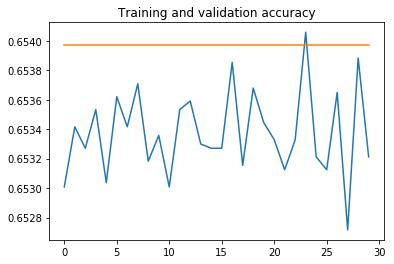

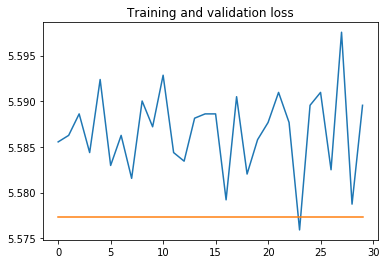

In [11]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples (2000), overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

In the next exercise, we'll look at ways to prevent overfitting in the cat vs. dog classification model.

In [12]:
#Export results
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.6530076181185251, 0.6534162219976393, 0.653270291168051, 0.653532965278311, 0.6530368025513451, 0.6536205230280268, 0.6534162215253321, 0.6537080819084964, 0.6531827330965052, 0.6533578492917854, 0.6530076175970737, 0.6535329658123747, 0.6535913374135691, 0.6532994778645531, 0.65327029190739, 0.6532702913106999, 0.65385401138118, 0.6531535472785118, 0.6536788954033526, 0.6534454073372368, 0.6533286637521314, 0.6531243616257825, 0.6533286638565087, 0.6540583139337363, 0.653211919349404, 0.6531243612082734, 0.6536497092957123, 0.6527157573034998, 0.6538831970139038, 0.6532119189840835]
[0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.6539719629092752, 0.653

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

import os, signal
os.kill(os.getpid(), signal.SIGKILL)